In [1]:
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential, Model
from keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils import class_weight

from keras.utils.np_utils import to_categorical

from sklearn import metrics
import seaborn as sns
import pandas as pd

In [2]:
path = "C:\\Users\\Josué\\Desktop\\SECURITY DATA SCIENCE\\Laboratorio6-SDS\\malimg_paper_dataset_imgs"

In [3]:
batches = ImageDataGenerator().flow_from_directory(directory=path, target_size=(64,64), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [4]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [5]:
images, labels = next(batches)

In [6]:
images.shape

(9339, 64, 64, 3)

In [7]:
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

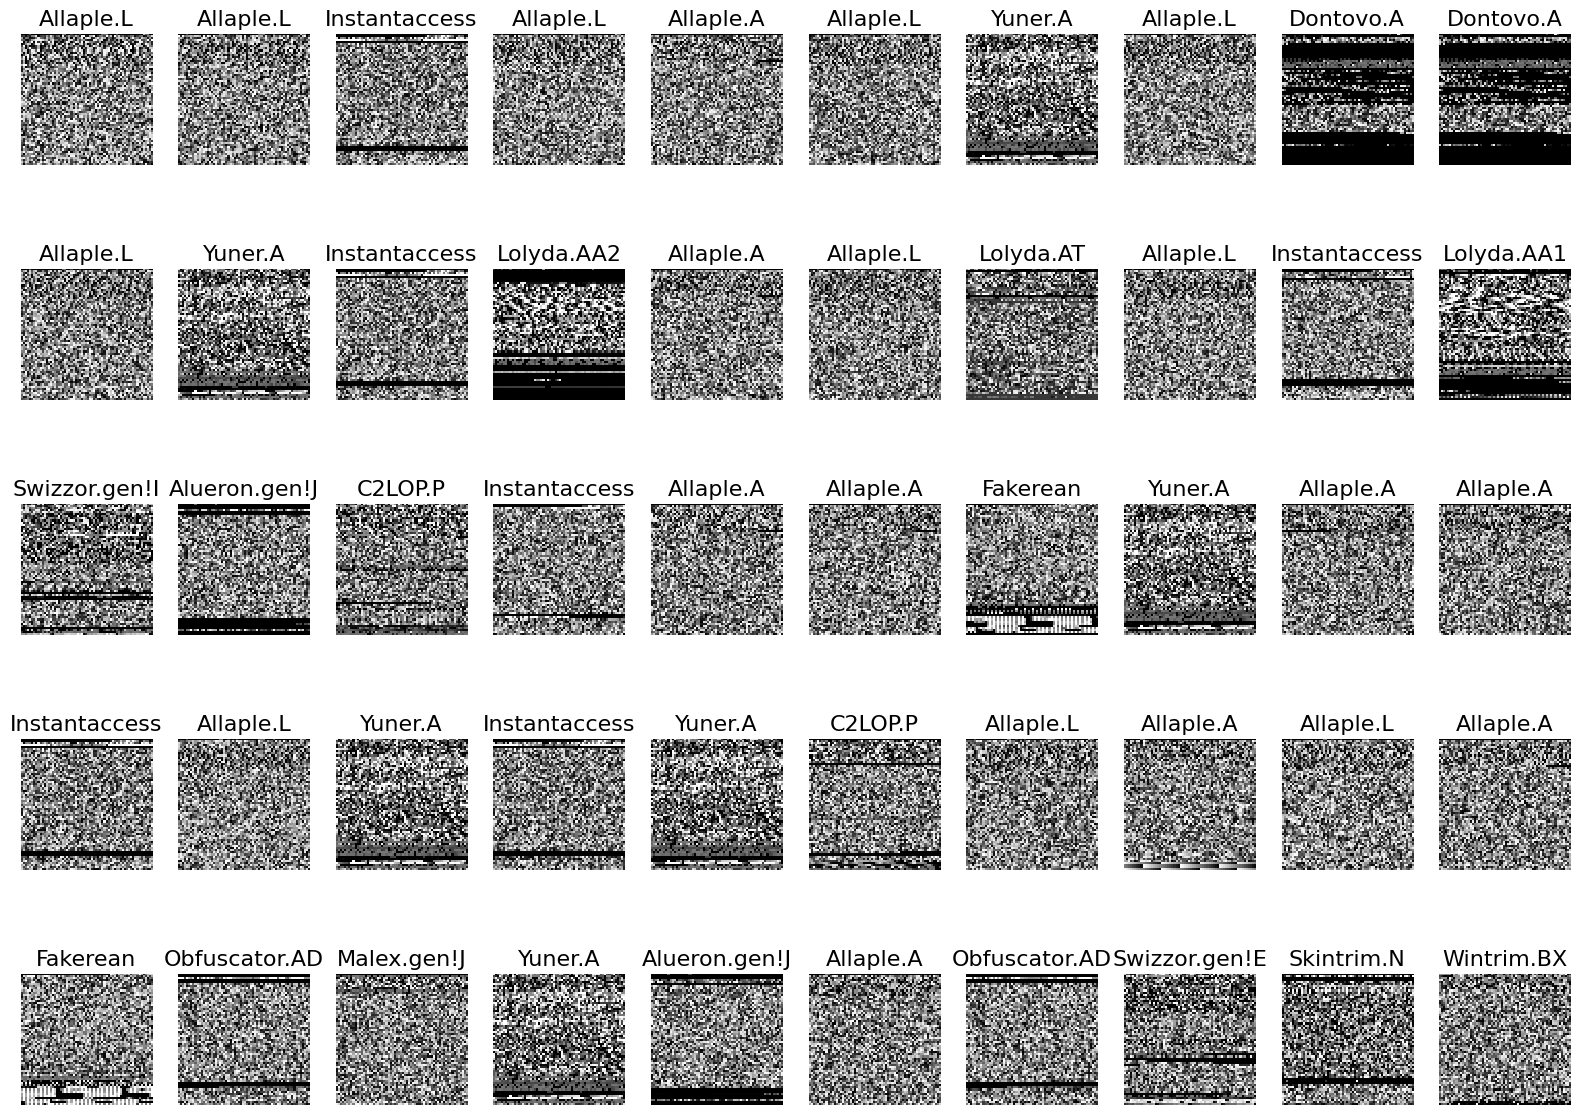

In [8]:
plots(images, titles = labels)

# Análisis

In [9]:
classes = batches.class_indices.keys()

In [10]:
perc = (sum(labels)/labels.shape[0])*100

<BarContainer object of 25 artists>

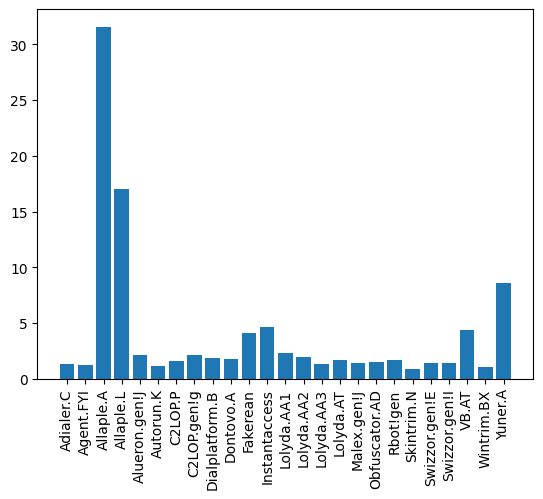

In [11]:
plt.xticks(rotation="vertical")
plt.bar(classes, perc)

# Entrenamiento y Prueba

In [14]:
x_train, x_test, y_train, y_test = train_test_split(images/255.,labels, test_size=0.3)

In [15]:
x_train.shape

(6537, 64, 64, 3)

In [16]:
x_test.shape

(2802, 64, 64, 3)

In [17]:
y_train.shape

(6537, 25)

In [18]:
y_test.shape

(2802, 25)

# Modelo de Deep Learning

In [21]:
num_classes = 25

#construccion del modelo
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

In [22]:
Malware_model = malware_model()

In [23]:
Malware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 30)        840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 15)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 15)        0         
                                                                 
 flatten (Flatten)           (None, 2940)              0

In [24]:
y_train_new = np.argmax(y_train, axis=1)
y_train_new

array([ 2, 13, 22, ..., 11,  2, 11], dtype=int64)

In [31]:
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train_new),y=y_train_new)

In [32]:
class_weights

array([3.15036145, 3.2685    , 0.12619691, 0.23641953, 1.90861314,
       3.30987342, 2.64121212, 1.80331034, 2.179     , 2.19731092,
       0.99801527, 0.87744966, 1.84140845, 2.16099174, 2.90533333,
       2.6148    , 2.75242105, 2.49028571, 2.46679245, 4.75418182,
       2.84217391, 2.87340659, 0.8629703 , 3.6828169 , 0.4619788 ])

In [33]:
Malware_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
205/205 [==============================] - 37s 170ms/step - loss: 1.7601 - accuracy: 0.4540 - val_loss: 0.7965 - val_accuracy: 0.7049
Epoch 2/10
205/205 [==============================] - 34s 168ms/step - loss: 0.7870 - accuracy: 0.7331 - val_loss: 0.4021 - val_accuracy: 0.9026
Epoch 3/10
205/205 [==============================] - 34s 167ms/step - loss: 0.4787 - accuracy: 0.8527 - val_loss: 0.2391 - val_accuracy: 0.9236
Epoch 4/10
205/205 [==============================] - 34s 168ms/step - loss: 0.3665 - accuracy: 0.8873 - val_loss: 0.2119 - val_accuracy: 0.9311
Epoch 5/10
205/205 [==============================] - 34s 167ms/step - loss: 0.2966 - accuracy: 0.9067 - val_loss: 0.1603 - val_accuracy: 0.9490
Epoch 6/10
205/205 [==============================] - 33s 163ms/step - loss: 0.2625 - accuracy: 0.9174 - val_loss: 0.1457 - val_accuracy: 0.9529
Epoch 7/10
205/205 [==============================] - 34s 167ms/step - loss: 0.2322 - accuracy: 0.9240 - val_loss: 0.1367 - val_ac

In [34]:
scores = Malware_model.evaluate(x_test, y_test)

88/88 [==============================] - 3s 36ms/step - loss: 0.1381 - accuracy: 0.9600


In [36]:
# Accuracy
scores[1]

0.9600285291671753

# Confusion Matrix

In [39]:
y_predict = np.argmax(Malware_model.predict(x_test), axis=-1)

88/88 [==============================] - 2s 19ms/step


In [40]:
y_predict

array([ 2,  7,  3, ...,  2,  2, 24], dtype=int64)

In [41]:
y_test2 = np.argmax(y_test, axis=1)

In [42]:
y_test2

array([ 2,  6,  3, ...,  2,  2, 24], dtype=int64)

In [44]:
matrix = metrics.confusion_matrix(y_test2, y_predict)

In [47]:
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [48]:
class_names= batches.class_indices.keys()

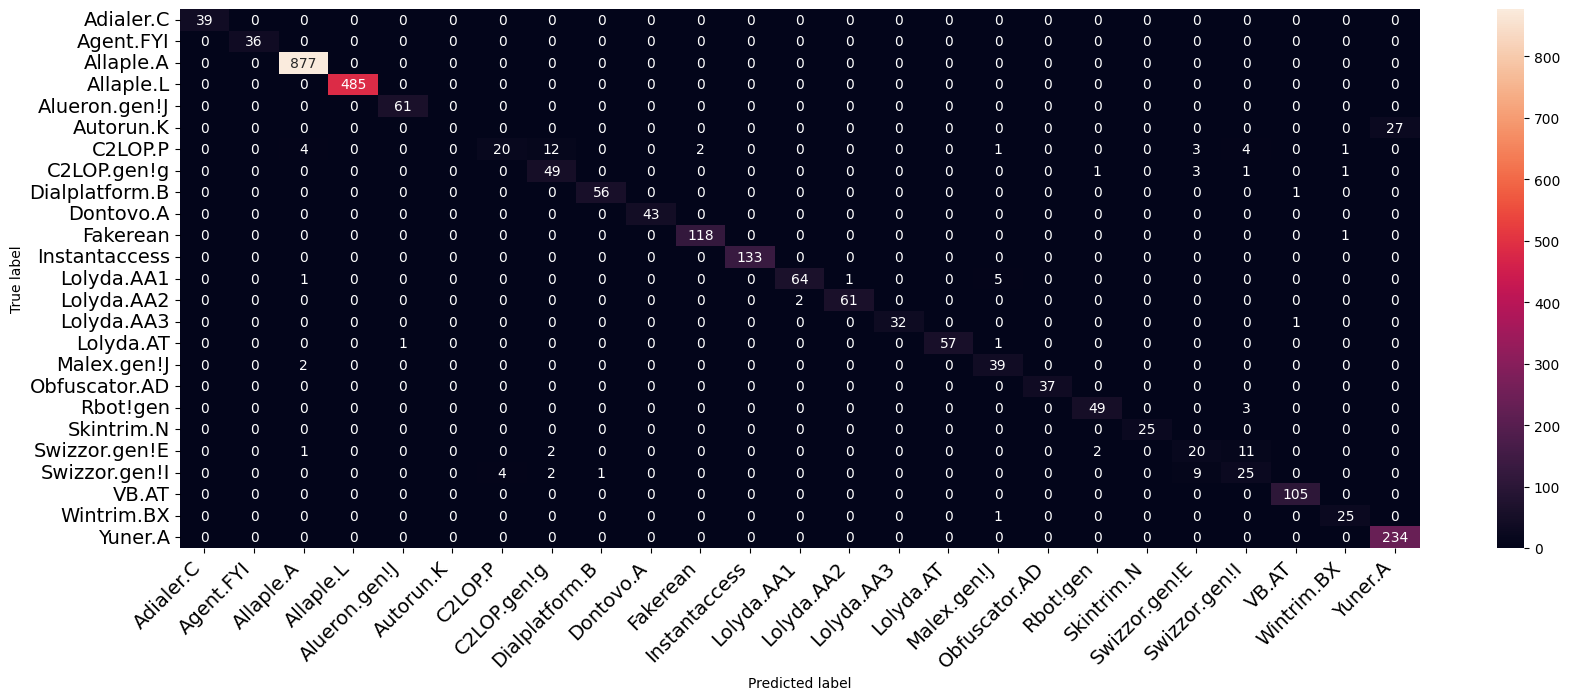

In [52]:
confusion_matrix(matrix, class_names, figsize = (20,7), fontsize=14)

# Conclusión

En general, los resultados obtenidos fueron bastante satisfactorios, pues el índice de accuracy es de 96%, es decir, el porcentaje de predicciones que se realizaron correctamente, tanto verdaderos positivos como verdaderos negativos. En el contexto de detección de malware esta se puede interpretar como la fiabilidad en general que tiene el modelo, y que este número sea alto es bastante bueno, aunque lo ideal sería que el accuracy fuera de 100%, pues lo que se busca es que el usuario final pueda estar completamente seguro de que si el modelo clasifica un archivo como benigno, que este sí sea benigno y no un falso negativo, lo cual podría llegar a perjudicar y comprometer su equipo de cómputo.

No obstante, se observaron dificultades que tuvo el modelo al intentar clasificar algunos tipos de malware, como es el caso de Swizzor.gen!E y Swizzor.gen!l, que en aproximadamente la mitad de las veces el modelo los confundía entre ellos. Esto se puede deber a la similitud estructural y funcional que comparten por pertenecer a la misma familia de malware.

Otro caso en el que se pudo observar bastante inconsistencia fue en el caso de Autorun.K, pues este fue incorrectamente clasificado como Yuner.A, esto pudo pasar debido a que la muestra de este tipo de malware era muy pequeña comparada con las muestras de las demás familias, provocando una falta de entrenamiento para la detección de este tipo de malware. La cantidad limitada de datos para este tipo pudo haber generado un sesgo en el modelo, y por ende, que este más incompetente al momento de distinguir entre estas dos clases de malware.

Para evitar este tipo de problemas y aumentar el desempeño del modelo, se sugiere aumentar la cantidad de muestras de entrenamiento para tratar de balancear más la data con respecto a la cantidad de tipos de malware. Y si esto no es posible, también se puede acudir a técnicas para aumentar la data para así enriquecer el conjunto de entrenamiento y que el modelo pueda aumentar su desempeño.